### **ANALYTICS FOR UNSTRUCTURED DATA ASSIGNMENT 1**



> TEAM MEMBERS: NITTALA VENKATA SAI ADITYA, APURVA AUDI, DISHA GANDHI, MUSKAAN SINGHANIA, TANVI DALAL





**Before performing any tasks, we have scarped 5000 comments from Edmunds.com starting page 335 to 435.**

url - https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p335

In [ ]:
!pip install selenium
!apt-get -q update   #Used to handle installation and removal of softwares and libraries
!apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By
#WebDriver is a browser automation framework that works with open source APIs. 
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
#headless means running chrome with chrome.exe
chrome_options.add_argument('--headless')

chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 985 kB 7.6 MB/s 
     |████████████████████████████████| 140 kB 44.2 MB/s 
     |████████████████████████████████| 358 kB 62.3 MB/s 
     |████████████████████████████████| 58 kB 4.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.downlo

In [ ]:
wd = webdriver.Chrome('chromedriver',options=chrome_options)

In [ ]:
import pandas as pd
import datetime
pageDf = pd.DataFrame(columns=['Date','Message'])
def crawler(pageNumber):
    print('Parsing Page Number {}'.format(pageNumber))
    pageString = '/p{}'
    urlString='https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans'
    if(int(pageNumber)>1):
        urlString = urlString+pageString.format(pageNumber)
    wd.get(urlString)
    
    #Get the whole comment box including the pag numbers in one element
    totalElements = wd.find_element(by=By.CLASS_NAME,value='CommentsWrap')
    
    #Extract the comments box
    elements = totalElements.find_elements(by=By.CLASS_NAME,value='Comment')
    pagingDf =  parsePage(elements,pageDf)
    
    #Extract the next page number boxes
    pageElements = totalElements.find_element(by=By.CLASS_NAME,value='P.PagerWrap')
    hrefs = pageElements.find_elements(by=By.TAG_NAME,value='a')
    print('Parsing Completed for Page Number {}'.format(pageNumber))
    
    #Find the index of the current page and see if it's the last page of the scraper
    pageList = [x.text for x in hrefs]
    pageIndex = pageList.index(pageNumber)
    
    #Last page will not have a next pagenumber, so we need to break the recursion call there
    if(len(hrefs[pageIndex+1].text)==0):
        return pagingDf
    else:
        next_page = hrefs[pageIndex+1].text
        print ('Next Page : {}'.format(next_page))
        return crawler(next_page)

In [ ]:
def parsePage(pageElement,pageDf):
    for element in pageElement:
        userComment=''
        
        #For blockquote texts, we don't want to duplicate the earlier comments when the user replies to it, hence replacing that string with blanks
        if(len(element.find_elements(by=By.CLASS_NAME,value='blockquote'))>0):
            blockquoteText = element.find_element(by=By.CLASS_NAME,value='blockquote').text
            elementText = element.find_element(by=By.CLASS_NAME,value='Message.userContent').text
            userComment = elementText.replace(blockquoteText,'').strip()
        else:
            userComment = element.find_element(by=By.CLASS_NAME,value='Message.userContent').text.strip()
        timeElement = element.find_element(by=By.TAG_NAME,value='time')
        date = timeElement.get_attribute('title')
        
        #Get the date in a specific format
        tempDate = datetime.datetime.strptime(date,'%B %d, %Y %I:%M%p')
        time = tempDate.strftime("%Y-%m-%d %H:%M:%S")
        pageDf.loc[len(pageDf.index)]=[time,userComment]
    return pageDf

In [ ]:
df = crawler('335')

Parsing Page Number 335
Parsing Completed for Page Number 335
Next Page : 336
Parsing Page Number 336
Parsing Completed for Page Number 336
Next Page : 337
Parsing Page Number 337
Parsing Completed for Page Number 337
Next Page : 338
Parsing Page Number 338
Parsing Completed for Page Number 338
Next Page : 339
Parsing Page Number 339
Parsing Completed for Page Number 339
Next Page : 340
Parsing Page Number 340
Parsing Completed for Page Number 340
Next Page : 341
Parsing Page Number 341
Parsing Completed for Page Number 341
Next Page : 342
Parsing Page Number 342
Parsing Completed for Page Number 342
Next Page : 343
Parsing Page Number 343
Parsing Completed for Page Number 343
Next Page : 344
Parsing Page Number 344
Parsing Completed for Page Number 344
Next Page : 345
Parsing Page Number 345
Parsing Completed for Page Number 345
Next Page : 346
Parsing Page Number 346
Parsing Completed for Page Number 346
Next Page : 347
Parsing Page Number 347
Parsing Completed for Page Number 347
Ne

In [ ]:
df.head()

,Date,Message
0,2014-02-25 18:50:00,@roadburner\nYou hit the nail on the head. You...
1,2014-02-25 19:09:00,now that I have inherited my Acura TL back (a ...
2,2014-02-25 19:25:00,@stickguy\nEven with the coil packs you had to...
3,2014-02-26 10:59:00,@nyccarguy\nExactly. You have to evaluate all ...
4,2014-02-26 11:14:00,Heresy if repeated over on Chronic Car Buyers!...


In [ ]:
df.to_csv('ScraperComments.csv',index=False)

**TASK A**

Once you fetch the data, test if the data support Zipf’s law econometrically. Also plot the most common 100 words in the data against the theoretical prediction of the law. For this question, do not remove stopwords. Also do not perform stemming or lemmatization. 

In [ ]:
import re
import nltk
from nltk.tokenize import RegexpTokenizer, word_tokenize
from collections import Counter
from scipy.stats import zipf
nltk.download('punkt')

#removing entries where comments text is not present
df = df.dropna(subset=['Message'],axis=0)
#Lowercasing the message text
df['Message']=df['Message'].apply(lambda x: x.lower())
#to remove Punctuation
punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@#'
df['Message']=df['Message'].apply(lambda x: re.sub('['+punctuation + ']+', ' ', x))
# To remove extra spacing
df['Message']=df['Message'].apply(lambda x: re.sub('\s+', ' ', x))
#Tokenize the words
df['Message_Tokens']=df.Message.apply(word_tokenize)

#finding 100 most common words
message_text = [word for one_message in df['Message_Tokens'] for word in one_message]
hundred_most_common_words = Counter(message_text).most_common(100)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
hundred_most_common_words

[('the', 24237),
 ('a', 11663),
 ('i', 11111),
 ('to', 10145),
 ('and', 9962),
 ('of', 7449),
 ('it', 6775),
 ('is', 6271),
 ('that', 6117),
 ('in', 6027),
 ('for', 4761),
 ('s', 3943),
 ('with', 3854),
 ('you', 3737),
 ('on', 3516),
 ('but', 3380),
 ('t', 3151),
 ('my', 3103),
 ('have', 2974),
 ('be', 2842),
 ('car', 2839),
 ('not', 2786),
 ('they', 2708),
 ('was', 2677),
 ('as', 2607),
 ('are', 2573),
 ('at', 2536),
 ('or', 2410),
 ('if', 1984),
 ('an', 1919),
 ('so', 1810),
 ('this', 1788),
 ('like', 1769),
 ('would', 1745),
 ('cars', 1633),
 ('one', 1627),
 ('can', 1619),
 ('more', 1595),
 ('just', 1503),
 ('all', 1488),
 ('bmw', 1425),
 ('has', 1424),
 ('about', 1408),
 ('we', 1405),
 ('new', 1301),
 ('will', 1300),
 ('what', 1298),
 ('than', 1284),
 ('get', 1281),
 ('from', 1270),
 ('me', 1258),
 ('had', 1254),
 ('up', 1206),
 ('there', 1167),
 ('audi', 1163),
 ('no', 1145),
 ('out', 1120),
 ('some', 1099),
 ('think', 1083),
 ('m', 1079),
 ('even', 1067),
 ('when', 1035),
 ('do',

After cleaning the data a little bit, we have extracted the list of 100 most common words and we will now plot the frequency along with the zipf frequency which is the ratio of frequency of that word with the rest of the corpus. In cleaning we only removed the punctuation, extra spaces and lowercased the text.

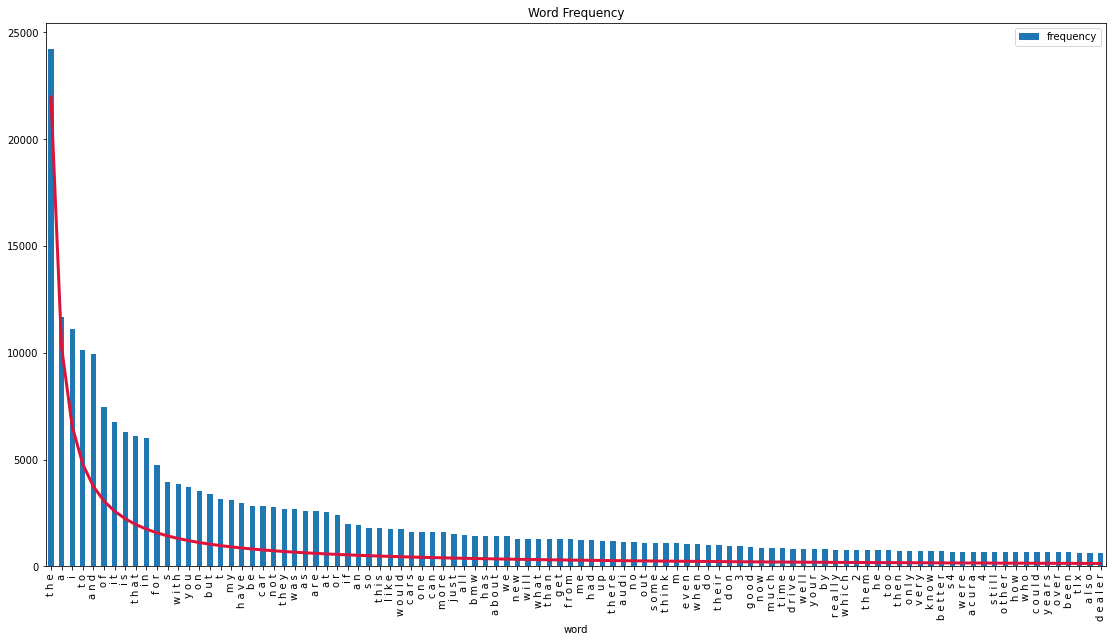

In [ ]:
#Zipf law plotting for 100 most common words
word_count = pd.DataFrame(data = hundred_most_common_words, 
                          columns=['word','frequency']) 
# Convert list to string
word_count['word'] = word_count['word'].apply(' '.join)
# Plot word count graph
plt=word_count.sort_values('frequency', ascending=False).plot.bar(x='word', y='frequency', title='Word Frequency',figsize=(19,10))
alpha = 1.1
total = sum([n for _, n in hundred_most_common_words])
plt.plot(range(len(hundred_most_common_words)), [zipf.pmf(p, alpha) * total for p in range(1, len(hundred_most_common_words) + 1)], color='crimson', lw=3)
#plt.savefig('wordcount.png')

We then also calculated the log of the frequency and plotted it against the words arranged in descending order which is nothing but the rank.

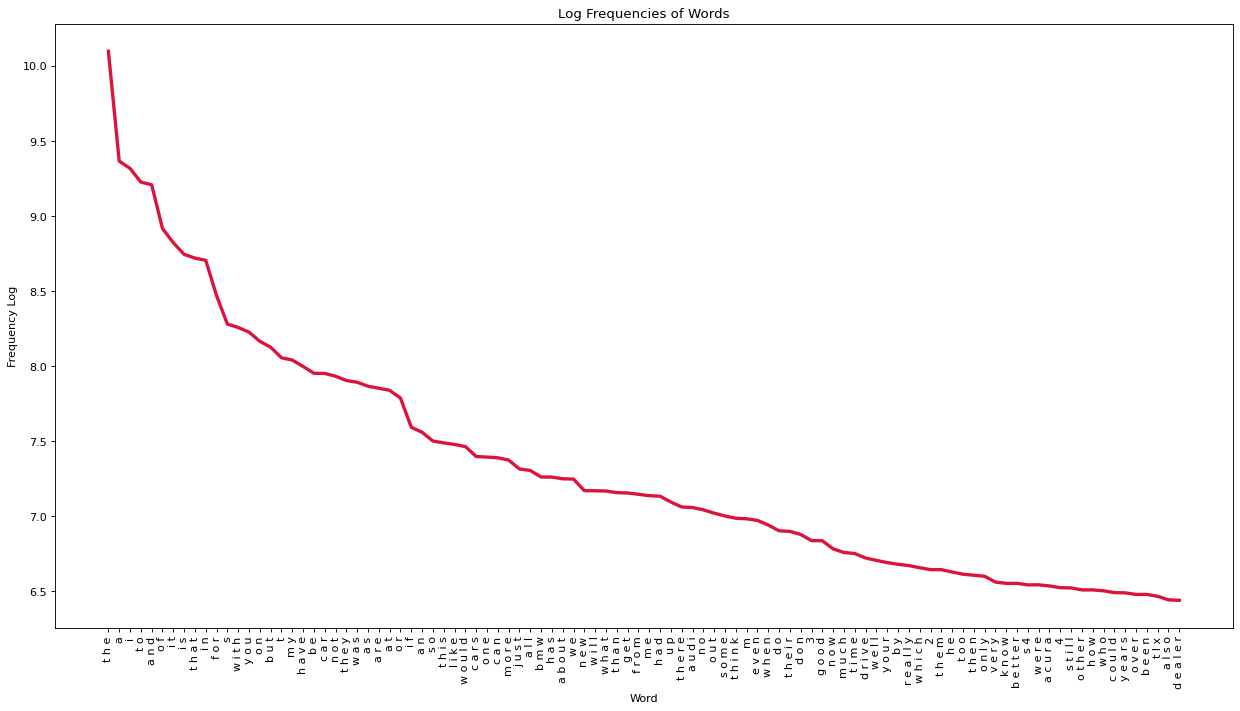

In [ ]:
import matplotlib.pyplot as plt
import math
word_count = pd.DataFrame(data = hundred_most_common_words, columns=['word','frequency'])
word_count['log_freq'] = word_count['frequency'].apply(lambda x: math.log(int(x)))
# Convert list to string
word_count['word'] = word_count['word'].apply(' '.join)
# Plot word count graph
plt.figure(figsize=(19, 10), dpi=80)
plt.plot(word_count['word'], word_count['log_freq'], color='crimson', lw=3)
plt.title('Log Frequencies of Words')
plt.xlabel('Word')
plt.ylabel('Frequency Log')
plt.xticks(rotation = 90)
plt.show()
#plt.savefig('wordcount_log.png')

**TASK B**

Find the top 10 brands from frequency counts. You will need to write a script to count the frequencies of words (stopwords should NOT be counted). Replace frequently occurring car models with brands so that from now on you have to deal with only brands and not models. You will need another script for this job. A list of model and brand names (not exhaustive) are provided in a separate file.

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')


data = df.copy()
#brand_model=pd.read_csv('gdrive/My Drive/Unstructured Data/carMapping.csv')
brand_model=pd.read_csv('/carMapping.csv')
brand_model.head()
brand_model = brand_model[['Brand','Model']].drop_duplicates()
brand_model = brand_model.drop_duplicates(subset='Model', keep='last')
brand_model['Model'] = brand_model['Model'].apply(lambda x: x.lower())
data['Message'] = data['Message'].astype(str)
data['Message'] = data['Message'].apply(lambda x: x.lower())
brand_model

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Brand,Model
0,acura,integra
2,acura,vigor
3,acura,rlx
4,acura,ilx
5,acura,mdx
...,...,...
524,volvo,xc90
525,volvo,s60
526,volvo,s80
527,volvo,v60


In [ ]:
brand_model_set = set(brand_model['Brand'])
brand_model_set

{'acura',
 'audi',
 'bmw',
 'buick',
 'cadillac',
 'car',
 'chevrolet',
 'chrysler',
 'dodge',
 'ford',
 'honda',
 'hyndai kia',
 'hyundai',
 'hyundai,',
 'hyundai.',
 'infiniti',
 'kia',
 'kia.',
 'lincoln',
 'mazda',
 'mercedes',
 'mercedes-benz',
 'mercury',
 'mitsubishi',
 'nissan',
 'nissan.',
 'pontiac',
 'saturn',
 'seat',
 'sedan',
 'subaru',
 'suzuki',
 'toyata',
 'toyota',
 'volkswagen',
 'volkwagen',
 'volvo'}

In [ ]:
pd.options.mode.chained_assignment = None 

# Replace the models in the message with brand names
def brandMapping(s):
    for index,row in brand_model.iterrows():
        if(row[1] in s):
            s  = s.replace(row[1],row[0])
    return s


data['MappedMessage'] = data['Message'].map(brandMapping)
data

,Date,Message,Message_Tokens,MappedMessage
0,2014-02-25 18:50:00,roadburner you hit the nail on the head you b...,"[roadburner, you, hit, the, nail, on, the, hea...",roadburner you hit the nail on the head you b...
1,2014-02-25 19:09:00,now that i have inherited my acura tl back a 2...,"[now, that, i, have, inherited, my, acura, tl,...",now that i have inherited my acura tl back a 2...
2,2014-02-25 19:25:00,stickguy even with the coil packs you had to ...,"[stickguy, even, with, the, coil, packs, you, ...",stickguy even with the coil packs you had to ...
3,2014-02-26 10:59:00,nyccarguy exactly you have to evaluate all yo...,"[nyccarguy, exactly, you, have, to, evaluate, ...",nyccarguy exactly you have to evaluate all yo...
4,2014-02-26 11:14:00,heresy if repeated over on chronic car buyers ...,"[heresy, if, repeated, over, on, chronic, car,...",heresy if repeated over on chronic car buyers ...
...,...,...,...,...
5028,2020-07-26 15:42:00,there s speculation that the ilx name might be...,"[there, s, speculation, that, the, ilx, name, ...",there s speculation that the acura name might ...
5029,2020-07-26 15:47:00,if they won t bring back integra the rsx is a ...,"[if, they, won, t, bring, back, integra, the, ...",if they won t bring back acura the acura is a ...
5030,2020-07-26 15:54:00,yes i d like to see acura bring back a hatchba...,"[yes, i, d, like, to, see, acura, bring, back,...",yes i d like to see acura bring back a hatchba...
5031,2021-05-05 18:35:00,explorerx4 how do you like your lincoln mkz a...,"[explorerx4, how, do, you, like, your, lincoln...",fordx4 how do you like your lincoln lincoln a...


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop = stopwords.words('english')
data['tokenized_message'] = data['MappedMessage'].apply(lambda s : word_tokenize(re.sub(r'[^\w\s]',' ',s)))
data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Date,Message,Message_Tokens,MappedMessage,tokenized_message
0,2014-02-25 18:50:00,roadburner you hit the nail on the head you b...,"[roadburner, you, hit, the, nail, on, the, hea...",roadburner you hit the nail on the head you b...,"[roadburner, you, hit, the, nail, on, the, hea..."
1,2014-02-25 19:09:00,now that i have inherited my acura tl back a 2...,"[now, that, i, have, inherited, my, acura, tl,...",now that i have inherited my acura tl back a 2...,"[now, that, i, have, inherited, my, acura, tl,..."
2,2014-02-25 19:25:00,stickguy even with the coil packs you had to ...,"[stickguy, even, with, the, coil, packs, you, ...",stickguy even with the coil packs you had to ...,"[stickguy, even, with, the, coil, packs, you, ..."
3,2014-02-26 10:59:00,nyccarguy exactly you have to evaluate all yo...,"[nyccarguy, exactly, you, have, to, evaluate, ...",nyccarguy exactly you have to evaluate all yo...,"[nyccarguy, exactly, you, have, to, evaluate, ..."
4,2014-02-26 11:14:00,heresy if repeated over on chronic car buyers ...,"[heresy, if, repeated, over, on, chronic, car,...",heresy if repeated over on chronic car buyers ...,"[heresy, if, repeated, over, on, chronic, car,..."
...,...,...,...,...,...
5028,2020-07-26 15:42:00,there s speculation that the ilx name might be...,"[there, s, speculation, that, the, ilx, name, ...",there s speculation that the acura name might ...,"[there, s, speculation, that, the, acura, name..."
5029,2020-07-26 15:47:00,if they won t bring back integra the rsx is a ...,"[if, they, won, t, bring, back, integra, the, ...",if they won t bring back acura the acura is a ...,"[if, they, won, t, bring, back, acura, the, ac..."
5030,2020-07-26 15:54:00,yes i d like to see acura bring back a hatchba...,"[yes, i, d, like, to, see, acura, bring, back,...",yes i d like to see acura bring back a hatchba...,"[yes, i, d, like, to, see, acura, bring, back,..."
5031,2021-05-05 18:35:00,explorerx4 how do you like your lincoln mkz a...,"[explorerx4, how, do, you, like, your, lincoln...",fordx4 how do you like your lincoln lincoln a...,"[fordx4, how, do, you, like, your, lincoln, li..."


In [ ]:
data['tokenized_message'] = data['tokenized_message'].apply(lambda words: [x for x in words if x not in stop])
data['tokenized_message_unique'] = data['tokenized_message'].apply(lambda s: sorted(set(s)))
data

,Date,Message,Message_Tokens,MappedMessage,tokenized_message,tokenized_message_unique
0,2014-02-25 18:50:00,roadburner you hit the nail on the head you b...,"[roadburner, you, hit, the, nail, on, the, hea...",roadburner you hit the nail on the head you b...,"[roadburner, hit, nail, head, budget, repairs,...","[amount, big, blow, budget, car, card, choosin..."
1,2014-02-25 19:09:00,now that i have inherited my acura tl back a 2...,"[now, that, i, have, inherited, my, acura, tl,...",now that i have inherited my acura tl back a 2...,"[inherited, acura, tl, back, 2000, 174k, clock...","[174k, 18, 2000, acura, already, assigned, awa..."
2,2014-02-25 19:25:00,stickguy even with the coil packs you had to ...,"[stickguy, even, with, the, coil, packs, you, ...",stickguy even with the coil packs you had to ...,"[stickguy, even, coil, packs, replace, still, ...","[190k, 2005, 35, 40, 40k, 50k, afford, blew, c..."
3,2014-02-26 10:59:00,nyccarguy exactly you have to evaluate all yo...,"[nyccarguy, exactly, you, have, to, evaluate, ...",nyccarguy exactly you have to evaluate all yo...,"[nyccarguy, exactly, evaluate, options, logica...","[buy, car, course, evaluate, exactly, excuse, ..."
4,2014-02-26 11:14:00,heresy if repeated over on chronic car buyers ...,"[heresy, if, repeated, over, on, chronic, car,...",heresy if repeated over on chronic car buyers ...,"[heresy, repeated, chronic, car, buyers, debat...","[100k, another, back, buyers, car, check, chro..."
...,...,...,...,...,...,...
5028,2020-07-26 15:42:00,there s speculation that the ilx name might be...,"[there, s, speculation, that, the, ilx, name, ...",there s speculation that the acura name might ...,"[speculation, acura, name, might, retired, new...","[acura, back, bring, car, might, name, new, po..."
5029,2020-07-26 15:47:00,if they won t bring back integra the rsx is a ...,"[if, they, won, t, bring, back, integra, the, ...",if they won t bring back acura the acura is a ...,"[bring, back, acura, acura, good, 2nd, choice,...","[2nd, acura, back, bring, choice, even, good, ..."
5030,2020-07-26 15:54:00,yes i d like to see acura bring back a hatchba...,"[yes, i, d, like, to, see, acura, bring, back,...",yes i d like to see acura bring back a hatchba...,"[yes, like, see, acura, bring, back, hatchback...","[2021, acura, also, back, bring, calendar, cou..."
5031,2021-05-05 18:35:00,explorerx4 how do you like your lincoln mkz a...,"[explorerx4, how, do, you, like, your, lincoln...",fordx4 how do you like your lincoln lincoln a...,"[fordx4, like, lincoln, lincoln, may, seen, fr...","[2018, far, fordx4, friend, got, like, lincoln..."


In [ ]:
#Frequency of words
freq_words = data['tokenized_message_unique'].sum()
freq_dist = nltk.FreqDist(freq_words)
freq_dist

FreqDist({'car': 1935, 'like': 1200, 'one': 1087, 'would': 1038, 'bmw': 1036, 'get': 911, 'think': 862, 'new': 850, 'audi': 841, 'even': 717, ...})

In [ ]:
brands_dict = {brand_key: freq_dist[brand_key] for brand_key in freq_dist.keys() if brand_key in brand_model_set}
car_brands = pd.DataFrame.from_dict(brands_dict, orient='index').reset_index()
car_brands.columns = ["brand","word_frequency"]
car_brands.sort_values("word_frequency", ascending= False, inplace=True)
brands_dict

{'car': 1935,
 'ford': 169,
 'acura': 529,
 'toyota': 213,
 'infiniti': 188,
 'audi': 841,
 'chevrolet': 118,
 'mazda': 79,
 'bmw': 1036,
 'chrysler': 67,
 'subaru': 97,
 'cadillac': 221,
 'lincoln': 73,
 'seat': 272,
 'buick': 80,
 'volkswagen': 244,
 'honda': 439,
 'volkwagen': 38,
 'sedan': 265,
 'nissan': 59,
 'mercedes': 202,
 'volvo': 141,
 'mercury': 12,
 'hyundai': 194,
 'dodge': 73,
 'kia': 129,
 'pontiac': 17,
 'suzuki': 4,
 'saturn': 3,
 'mitsubishi': 2}

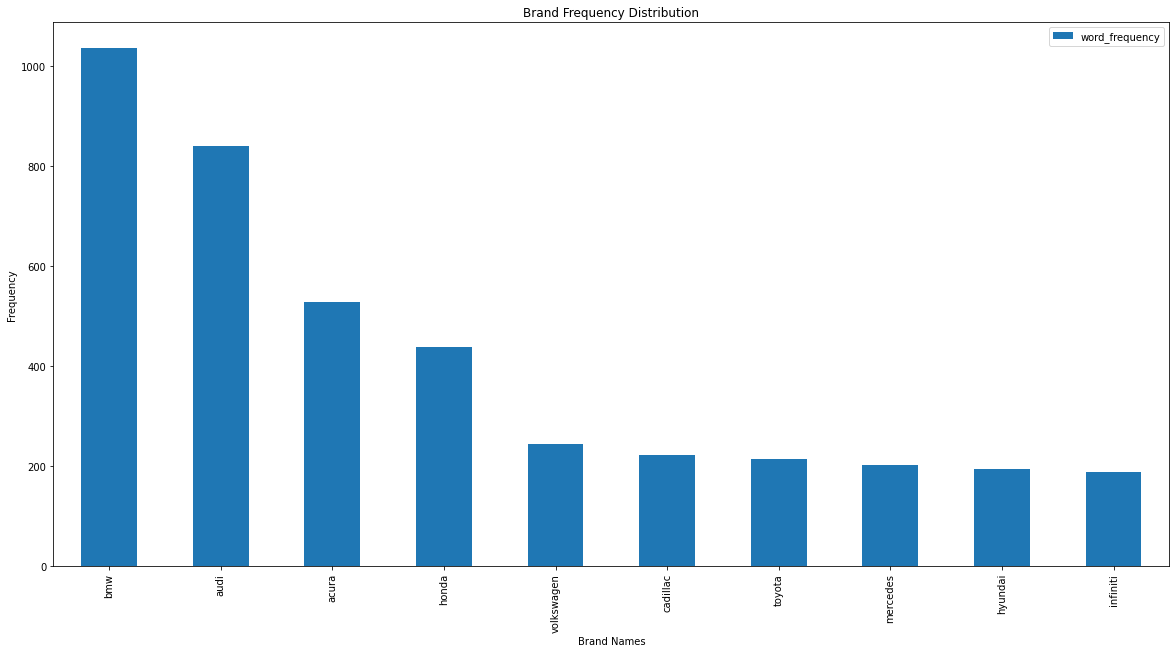

In [ ]:
##Removing noise words from the car_brands
car_brands = car_brands[~car_brands.brand.isin(['car','sedan','seat','problem'])]
top10_car_brands=car_brands.sort_values(by="word_frequency",ascending=False).head(10)
top10_car_brands
top10_car_brands = top10_car_brands.set_index('brand')

#Plot the Graph
top10_car_brands.plot(kind="bar",xlabel="Brand Names",ylabel="Frequency",title='Brand Frequency Distribution',figsize=(20,10))


**These are the top 10 brands that we found out and we have also plotted the frequency of it in the comments.**

In [ ]:
top10_car_brands

,word_frequency
brand,
bmw,1036
audi,841
acura,529
honda,439
volkswagen,244
cadillac,221
toyota,213
mercedes,202
hyundai,194


**TASK C**

Calculate lift ratios for associations between the top-10 brands identified in Task A. You will have to write a script to do this task). For lift calculations, be sure not to count a mention more than once per post, even if it is mentioned multiple times in the post. 
*italicised text*

In [ ]:
# Function to calculate Lift Ratios

def lift_analysis(a, b, message_tokens):
    freq_a = 0
    freq_b = 0
    freq_a_b = 0
    n = len(message_tokens)
    if a==b:
        return 0
    for i in message_tokens:
        if a in i:
            freq_a += 1
        if b in i:
            freq_b += 1
        if a in i and b in i:
            freq_a_b += 1
    if freq_a == 0:
        return (float(n)*freq_a_b)/(freq_b)
    elif freq_b == 0:
        return (float(n)*freq_a_b)/(freq_a)
    else:
        return (float(n)*freq_a_b)/(freq_a*freq_b)

In [ ]:
# Calling the function defined to calculate lift with the relevant parameters
top10_car_brands = top10_car_brands.reset_index()
lift_df = []
for index, a in top10_car_brands.iterrows():
    for index, b in top10_car_brands.iterrows():
        lift_df.append(lift_analysis(a.brand, b.brand, data.tokenized_message_unique))
top10_car_brands

,brand,word_frequency
0,bmw,1036
1,audi,841
2,acura,529
3,honda,439
4,volkswagen,244
5,cadillac,221
6,toyota,213
7,mercedes,202
8,hyundai,194
9,infiniti,188


**Lift Values**

In [ ]:
# Getting the DataFrame in a matrix form for ease of calculation in future steps and taking only the upper triangle
import numpy as np
lift_analysis = np.reshape(lift_df,(10,10))
lift_data = pd.DataFrame(data= lift_analysis)
for i in range(10):
    lift_data = lift_data.rename(columns = {i: top10_car_brands.iloc[i, 0]})
    lift_data = lift_data.rename(index = {i: top10_car_brands.iloc[i, 0]})
lift_data

,bmw,audi,acura,honda,volkswagen,cadillac,toyota,mercedes,hyundai,infiniti
bmw,0.000000,1.964039,1.451004,1.173028,1.333989,2.044362,1.550945,3.487256,1.402340,2.351531
audi,1.964039,0.000000,2.183396,1.840349,2.796057,3.005811,1.854365,3.614426,1.727497,3.119602
acura,1.451004,2.183396,0.000000,3.705978,1.325746,2.583035,1.652698,3.249892,1.961686,4.655874
honda,1.173028,1.840349,3.705978,0.000000,2.161376,1.660046,3.444790,2.043213,2.304758,2.439296
volkswagen,1.333989,2.796057,1.325746,2.161376,0.000000,1.493361,2.324175,2.246510,2.232825,2.084649
cadillac,2.044362,3.005811,2.583035,1.660046,1.493361,0.000000,1.924543,5.862551,2.347810,4.482069
toyota,1.550945,1.854365,1.652698,3.444790,2.324175,1.924543,0.000000,2.339516,3.897585,2.262361
mercedes,3.487256,3.614426,3.249892,2.043213,2.246510,5.862551,2.339516,0.000000,3.082372,5.698836
hyundai,1.402340,1.727497,1.961686,2.304758,2.232825,2.347810,3.897585,3.082372,0.000000,3.311911
infiniti,2.351531,3.119602,4.655874,2.439296,2.084649,4.482069,2.262361,5.698836,3.311911,0.000000


**TASK D**

*Show the brands on a multi-dimensional scaling (MDS) map (use a Python script for MDS, there are multiple scripts available on GitHub).*

**MDS Plot**

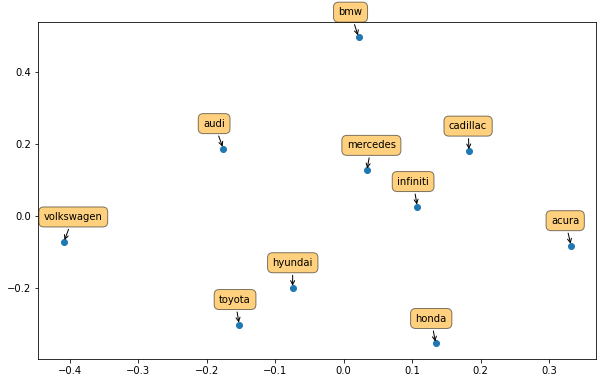

In [ ]:
## Calculating the dissimilarity matrix which is the input for plotting MDS plot
dissimilarity_matrix = 1/lift_data
dissimilarity_matrix.replace([np.inf, -np.inf], 0, inplace=True)
#print(dissimilarity_matrix)
## Plotting MDS plot
from sklearn import manifold

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, 
      random_state=3, dissimilarity="precomputed", n_jobs=1)
results = mds.fit(dissimilarity_matrix)
coords = results.embedding_

plt.figure(figsize=(10,6))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for label, x, y in zip(lift_data, coords[:, 0], coords[:, 1]):
    
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points',ha = 'left', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'orange', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

**TASK E** 

*What insights can you offer to your client from your analyses in Tasks C and D* 


Right off the bat, we can see from the plot that **“Cadillac”, “Merecedes” and “Infiniti”** are **highly associated** which makes sense because all three are **luxury car** brand and would be compared to each other more often than not. The high lift ratios between the three validate our former statement. 

Additionally, we can see from the plot that **“Hyundai”, “Toyota” and “Honda”** are **close to each other** on the MDS plot which again makes sense since all of these are **affordable car brands** and would be compared to each other extensively. 

Both of the above observations is a proof of **intuitiveness of the MDS map**. 

Moving on to more subtle observations, we notice that **Acura** is associated with both the **Luxury** and **Affordable cars clusters** especially **Honda** in the latter. This could be due to the fact **Acura is a luxury line introduced by Honda** and hence Acura tends to show association with both Honda and the other Luxury cars.

Another point worth mentioning is that all our **inter-brand lift ratios** are **greater than 1** which shows that association between any of the brands compared is **not a coincidence or random**

On the other side of things, **“Honda” and “BMW”, “Volkswagen” and “Acura” and “Volkswagen” and “BMW”** are **not that associated** which further validates our analysis as BMW and Acura are luxury car brands whereas Honda and Volkswagen are affordable car brands.  


**TASK F**

To find out the relation between attributes and brands we first find out top 5 attributes and top 5 brands. The process followed for them is as follows:

1) For top 5 brands we went back to Task B and simply took the first 5 brands in the top 10 car brands list.

2) For top 5 attributes we went back to Task A and found out the first 5 most occuring attributes in the hundred most occuring words, though for this task we ran that code segment after removing stopwords. The attributes we observed have been listed down in top_5_properties variable.

After we found out the key entities we simply calculated the lift of attributes and brands occuring together.

In [ ]:
import numpy as np
scraped = data.copy()
top_5_brands = ['bmw','audi','acura','honda','volkswagen']
top_5_properties = ['price', 'engine', 'performance', 'luxury', 'power']

lift_table = pd.DataFrame(columns = top_5_properties,index = top_5_brands)

for i in range(len(top_5_brands)):
    for j in range(len(top_5_properties)):
        brand_count = 0
        feature_count = 0
        brand_with_feature_count = 0
        for comment in scraped['MappedMessage']:
            if top_5_brands[i] in comment:
                brand_count += 1
                if top_5_properties[j] in comment:
                    brand_with_feature_count += 1
            if top_5_properties[j] in comment:
                feature_count += 1
        lift = ((brand_with_feature_count * 5000) / (brand_count * feature_count))
        lift_table.loc[top_5_brands[i], top_5_properties[j]] = lift

lift_table.sort_index(inplace=True)

lift_table

,price,engine,performance,luxury,power
acura,1.671206,1.88401,2.006103,2.412281,1.885537
audi,1.736611,1.868755,2.081945,1.971021,1.901702
bmw,1.828654,1.602452,1.895124,1.684344,1.80077
honda,1.897351,1.911315,1.887358,2.09265,2.105915
volkswagen,1.505591,2.258156,1.710571,1.693423,2.218279


The most strongly associated attributes for each brand are as follows: 

- bmw: performance & price
- audi: performance & luxury
- acura: luxury
- honda: power
- volkswagen: engine

**Below is also the frequency table of the 5 attributes we chose just for reference as per the ask**

In [ ]:
attribute_frequency = pd.DataFrame(index = top_5_properties)

for i in range(len(top_5_properties)):
  for comment in scraped['MappedMessage']:
    if top_5_properties[i] in comment:
      feature_count += 1
  attribute_frequency.loc[top_5_properties[i], 'frequency'] = feature_count

attribute_frequency

,frequency
price,899.0
engine,1335.0
performance,1651.0
luxury,1936.0
power,2258.0


**TASK G**

According to the analysis in Task F, the five most frequently discussed attributes are *'power', 'luxury', 'performance’, ' engine'* and *'price'*. The discussions on social media clearly suggest that 'power' i.e., horsepower of the cars undoubtedly drives the conversation and will have a major stake in customer's purchase decision. This is closely followed by 'luxury' of the car that expresses prospective buyers interests in purchasing a car that is comfortable and accentuates their social status. While 'performance' and 'engine' of the car is valued for the superior speed, mileage, and type of engine - hybrid & combustion, customers often talk about the 'price' of the cars. To make all decisions around R&D, manufacturing and advertising, these attributes must be carefully considered.
 
Keeping in mind these attributes, we are presenting our insights for any brand entering the luxury car market in USA with the top competitors: Acura, Audi, BMW, and Volkswagen
 
**Competitive Analysis for Luxury Brands**
 
**Acura - Honda**
 
Acura has a lift ratio of 2.4 for luxury which is the highest for any of the luxury car brands. It is noteworthy that customers associate Acura with performance and talk about its engine and power comparably. However, surprisingly, the price isn't discussed as frequently as the other attributes. It is highly likely that Acura is slightly more affordable in luxury car options and hence, customers don't talk as much about the Acura and their price as compared to their other attributes.
 
Initially, it was astonishing to observe that customers associate Honda with luxury i.e., a lift ratio of about 2.1.  However, as Honda is the parent company of Acura, it is possible that few customers talking about Acura on social media referred to it as Honda's luxury car which increased the co-mentions of Honda and luxury. **Overall, any car brand looking to penetrate the luxury car market in USA will face fierce competition from Acura as they are relatively affordable with high performance and horsepower - satisfying absolutely all needs of the car owners.**
 
**Audi**
 
Audi's cars are known for their exceptional performance and power as observed in the lift ratio of 2.08 and 1.9 respectively. Customers perception of this car brand makes them the top performing luxury car and the co-mentions of this car brand with luxury show a lift ratio of 1.97. This makes Audi a close second competition to Acura in terms of luxury cars in affordable range with a lift ratio of 1.7 with price. **This suggests that Audi's price is more talked about as compared to Acura and could be a direct result of a slight price difference in the average luxury car manufactured by Audi and Acura.**
 
**BMW**
 
With a lift ratio of 1.89 for performance and BMW, this car brand is in the league of **high performing luxury brands**. Although, it is a bit concerning to observe that the lift ratio for luxury is a staggering 1.68 and for engine is a slightly lower ratio of 1.6 as compared to other competitive luxury brands. This is quite alarming for the brand as customers perceive this luxury line as moderate at best in terms of its horsepower and engine, relative to other brands. To add to it, the lift ratio of price and BMW is slightly higher making it evidently, more expensive than Acura and Audi's average car prices.
 
**Volkswagen**
 
Amongst all the luxury cars, Volkswagen has a high lift ratio of 2.25 to engine and of 2.2 of power. However, fewer customers associated this brand with luxury. On the other hand, the lift ratio with price is least for Volkswagen. Hence, it is easy to say that **Volkswagen is the most affordable, moderately luxurious car with a high horsepower and engine in the luxury car models.**

 
 
**Recommendations to enter the luxury car market in USA**
 
1.	*Volkswagen* and *Acura* are the **most affordable luxury cars**. For penetrating this established market, any luxury car brand must try to match or compete at their prices to acquire a market share with a customer segment looking for affordable luxury cars.

2.	*BMW* is most notable for being **high performing luxury brand** but isn't as affordable as other car brands. This might have swayed many customers to a slightly lower performing but affordable cars. Meeting the demand for high performing, affordable luxury cars is what a new car brand can cater to. Most customers of luxury brands will find this attractive and can even churn few loyal customers.
3.	*Audi* is a **perfect blend of luxury and performance**. If a new brand can merge with Audi and leverage their high performing luxury cars and sell at a lower cost, they are bound to hold a major share of the high performing, affordable luxury cars market in the USA.

**TASK H**

We came up with a set of words, bigrams, and trigrams that were associated with the effect of aspiration. The list is as below and can be expanded as per the desire.

In [ ]:
aspiration_list=['desire','desirable','fancy','eager','like','love','dream','want','dream','cant wait to',
                 'love to','wish to','want to','aspire to','future car','thinking to buy','love to buy',
                 'want to own','love to own','like to own','have to own','nice to own','nice to buy','have to buy',
                 'would love to buy','wish to own','looking to buy','looking forward to buy','next car', 'winner', 'favor',
                 'prefer', 'promising', "bang for buck", 'go drive', 'go for', 'want', 'heart', 'dream to buy', 'buy', 
                 'purchase', 'love', 'wanted', 'decided to', 'desire','desirable', 'go with', 'top car', 'better value', 
                 'seriously look','anticipate', 'expect','would like to buy','would love to buy','eager to buy',
                 'love to have','desire of','dream of', 'dream to', 'love to','to own','own','favorite','always wanted']

We then replaced all these aspirational phrases with the word 'aspiration' and calculated lift for this word against these brands in order to find the association.

In [ ]:
taskh=data.copy()

def replace_aspirations(x):
    for word in aspiration_list:
        x=x.replace(word,'aspiration')
    return x

taskh["message_with_aspirations"]= taskh['MappedMessage'].apply(lambda x: replace_aspirations(x))

In [ ]:
aspiration_summary = pd.DataFrame(columns = ['brand', 'brand_count', 'aspiration_count', 'lift', 'aspiration_percent'])

aspiration_summary['brand'] = list(top10_car_brands['brand'])

total_aspiration_count = 0
total_comments = len(taskh)

for comment in taskh['message_with_aspirations']:
    if 'aspiration' in comment:
        total_aspiration_count += 1
        
for brand in aspiration_summary['brand']:
    brand_count = 0
    aspiration_per_brand_count = 0
    for comment in taskh['message_with_aspirations']:
        if brand in comment:
            brand_count += 1
        if 'aspiration' in comment and brand in comment:
            aspiration_per_brand_count += 1
    aspiration_summary.loc[aspiration_summary['brand'] == brand, 'brand_count'] = brand_count
    aspiration_summary.loc[aspiration_summary['brand'] == brand, 'aspiration_count'] = aspiration_per_brand_count
    
aspiration_summary['aspiration_percent'] = aspiration_summary['aspiration_count']/aspiration_summary['brand_count']
aspiration_summary['lift'] = (total_comments*aspiration_summary['aspiration_count'])/(aspiration_summary['brand_count']*total_aspiration_count)
aspiration_summary.sort_values(by = 'lift')

,brand,brand_count,aspiration_count,lift,aspiration_percent
8,hyundai,205,133,1.336599,0.64878
0,bmw,1052,694,1.359087,0.659696
5,cadillac,228,151,1.364412,0.662281
2,acura,560,372,1.368543,0.664286
4,volkswagen,259,175,1.392008,0.675676
9,infiniti,199,135,1.397604,0.678392
1,audi,988,672,1.401251,0.680162
6,toyota,1196,854,1.471059,0.714047
3,honda,612,443,1.491268,0.723856
7,mercedes,202,155,1.580825,0.767327


- As we can observe from the above lift table 'Mercedes' is the most aspirational brand as it has the highest lift and the highest aspiration percentage.

- Mercedes is followed by Honda and Toyota which makes quite a bit of sense as Toyota and Honda have a huge share in the market for their quality and prices.

- Hyundai should be concerned on it's low desire. We know that it is not an american brand which might be the reason behind these results.

- BMW having a low aspiration comes out to be a shock because BMW is quite a popular brand and the results should have been better for it.

- Audi being in the top 5 makes a lot of sense as we know from Task F that it is associated heavily with luxury and performance.